In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('jobs_in_data.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [13]:
df['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [14]:
df['job_category'].replace({'Data Management and Strategy': 'Leadership and Management'}, inplace=True)
print(df['job_category'].unique())

['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Cloud and Database']


In [16]:
df = df[['job_title' , 'job_category' , 'salary_in_usd' , 'employee_residence' , 'experience_level' , 'employment_type' , 'company_location' , 'company_size']]
df = df[df['employment_type'] == 'Full-time']
df

,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,company_location,company_size
0,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Germany,L
1,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,United States,M
2,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,United States,M
3,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,United States,M
4,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,United States,M
...,...,...,...,...,...,...,...,...
9349,Data Engineer,Data Engineering,28369,Malta,Mid-level,Full-time,Malta,L
9350,Data Specialist,Leadership and Management,165000,United States,Senior,Full-time,United States,L
9351,Data Scientist,Data Science and Research,412000,United States,Senior,Full-time,United States,L
9352,Principal Data Scientist,Data Science and Research,151000,United States,Mid-level,Full-time,United States,L


In [18]:
df['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [19]:
df['company_location'].value_counts()

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

In [20]:
def shorten_category(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [21]:
country_map =shorten_category(df.company_location.value_counts() , 60)
df['company_location'] = df['company_location'].map(country_map)
df['company_location'].value_counts()

United States     8132
United Kingdom     449
Other              363
Canada             226
Spain              113
Germany             72
Name: company_location, dtype: int64

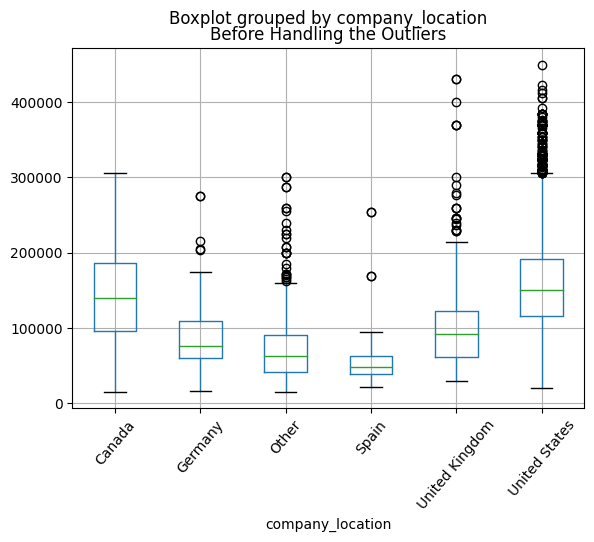

In [22]:
df.boxplot('salary_in_usd' , 'company_location')
plt.title('Before Handling the Outliers')
plt.xticks(rotation = 50)
plt.show()

In [23]:
def find_outliers(df, column_name, location_value):
    subset = df[df['company_location'] == location_value][column_name]
    
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df['company_location'] == location_value) & ((df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR))]
    
    return outliers

In [24]:
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'United States')
df.drop(outliers_us_salary.index, inplace=True)
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'Other')
df.drop(outliers_us_salary.index, inplace=True)
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'United Kingdom')
df.drop(outliers_us_salary.index, inplace=True)

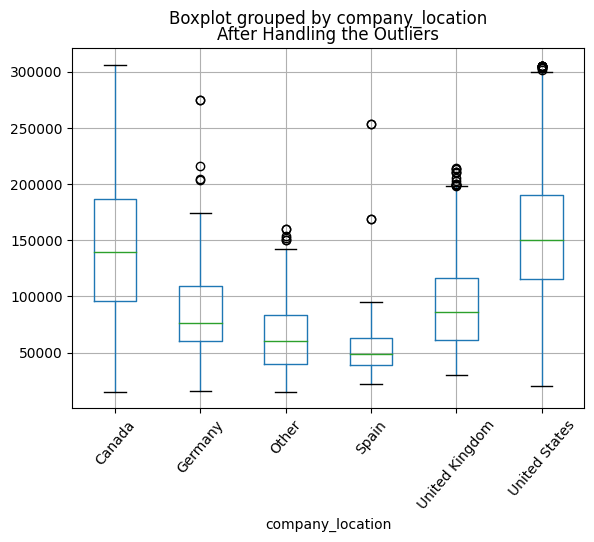

In [25]:
df.boxplot('salary_in_usd' , 'company_location')
plt.title('After Handling the Outliers')
plt.xticks(rotation = 50)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['job_title'] = le_education.fit_transform(df['job_title'])
df["job_title"].unique()

array([ 41,  40,  67, 100,  43,  94,  34,   7,  11,  17,  24, 117, 115,
       116,  63,  59,  57, 101,   2,  92,  76,  51,  58,  61,  21,  50,
        91,  62,  83,  14,  48,  97,  69,  15,  45,  25,  46,  66,  23,
         4,  47,  49,   1,   0,  65,  70,  26,  95,  60,  78,  20,  75,
        82,  71,  31,  74,  86,  73,  79,  38,  13,  42, 112,  64, 120,
        44, 102,  98,   5,  85,   8,   3,  53,  10,  37,  54,  96,  89,
       113, 111, 109,  84, 122, 121,  33, 103,  22,  55,  90, 105,  52,
        81, 119,  99,  30,  56,  28, 108,   6, 114,  93,  72,  12, 118,
         9,  80,  19,  87,  16,  29,  77,  39,  18,  32, 107, 104,  35,
        68, 106,  36,  27,  88, 110])

In [27]:
le_education = LabelEncoder()
df['job_category'] = le_education.fit_transform(df['job_category'])
df["job_category"].unique()

array([4, 3, 7, 9, 2, 8, 0, 6, 5, 1])

In [28]:
le_education = LabelEncoder()
df['employee_residence'] = le_education.fit_transform(df['employee_residence'])
df["employee_residence"].unique()

array([29, 79, 78, 12, 69, 38, 67, 58, 20, 52, 55, 76, 45, 59,  5, 27, 75,
       16, 39, 66, 61, 31, 34, 44, 49,  4, 18, 72, 68, 25, 74, 57, 10, 62,
       42, 73, 30,  7, 71,  2, 23, 56, 50, 51, 54, 63,  3, 24, 80, 28, 13,
       26,  6, 65, 70, 43, 19,  9, 36,  1, 15, 17, 14, 60, 21,  8, 22, 35,
       77, 47, 40, 32,  0, 81, 37, 11, 41, 64, 53, 33, 46, 48])

In [29]:
le_education = LabelEncoder()
df['experience_level'] = le_education.fit_transform(df['experience_level'])
df["experience_level"].unique()

array([2, 3, 1, 0])

In [30]:
le_education = LabelEncoder()
df['employment_type'] = le_education.fit_transform(df['employment_type'])
df["employment_type"].unique()

array([2, 3, 0, 1])

In [31]:
le_education = LabelEncoder()
df['company_location'] = le_education.fit_transform(df['company_location'])
df["company_location"].unique()

array([1, 5, 4, 0, 3, 2])

In [32]:
le_education = LabelEncoder()
df['company_size'] = le_education.fit_transform(df['company_size'])
df["company_size"].unique()

array([0, 1, 2])

In [41]:
X = df.drop(['work_year', 'salary_in_usd', 'work_setting', 'salary_currency', 'job_title'] , axis = 1)
Y = df['salary_in_usd']
X

,job_category,salary,employee_residence,experience_level,employment_type,company_location,company_size
0,4,88000,29,2,2,1,0
1,3,186000,79,3,2,5,1
2,3,81800,79,3,2,5,1
3,7,212000,79,3,2,5,1
4,7,93300,79,3,2,5,1
...,...,...,...,...,...,...,...
9349,4,24000,48,2,2,2,0
9350,5,165000,79,3,2,5,0
9352,7,151000,79,2,2,5,0
9353,7,105000,79,0,2,5,2


In [42]:
linear_model = LinearRegression()
linear_model.fit(X,Y.values)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = linear_model.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$7,995.23


In [54]:
y_pred = linear_model.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
mean_y = np.mean(Y)
percentage_error = (error / mean_y) * 100
print("Percentage error: {:.2f}%".format(percentage_error))


Percentage error: 5.46%


In [46]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)

DecisionTreeRegressor(random_state=0)

In [47]:
y_pred = dec_tree_reg.predict(X)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$472.32


In [53]:
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
mean_y = np.mean(Y)
percentage_error = (error / mean_y) * 100
print("Percentage error: {:.2f}%".format(percentage_error))

Percentage error: 0.32%


In [58]:
X = np.array(['Data Engineering', 'Germany', 'Mid-level', 'Full-time', 'United States', 'M', ''])

In [59]:
le_education = LabelEncoder()
all_unique_values = np.unique(X)  
le_education.fit(all_unique_values)

X = le_education.transform(X)
X = X.astype(float)
X

array([1., 3., 5., 2., 6., 4., 0.])

In [60]:
y_pred = dec_tree_reg.predict(X.reshape(1, -1))
y_pred

array([15966.])

In [61]:
import pickle
data = {'model' : dec_tree_reg, 'le_education' : le_education}
with open('saved_steps.pkl' , 'wb') as file:
    pickle.dump(data, file)

In [62]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_education = data["le_education"]

In [63]:
y_pred = regressor_loaded.predict(X.reshape(1, -1))
y_pred

array([15966.])